In [45]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import seaborn as sns
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/pict/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/pict/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pict/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data = ""
with open('testdoc.txt', 'r') as file:
    data = file.read()

data = data.split('\n')
print(data)

["Millions of people in India took part in an annual tree planting drive Sunday. More than 250 million saplings were planted in a single day across the country's most-populous state.", 'The campaign was led by Uttar Pradesh state government officials, lawmakers, and activists, in a bid to reduce carbon emissions and combat climate change.', 'Where were the trees planted?', 'The saplings were planted by volunteers in forests, farms, schools, and along riverbanks and highways.', '"We are committed to increasing the forest cover of Uttar Pradesh to over 15% of the total land area in the next five years,\'\' said state forest official Manoj Singh.', 'According to another government official, the forest cover of the state has increased over the last few years.', '"There has been an increase of 127 sqare kilometers [79 sqare miles]\xa0in the forest cover in Uttar Pradesh as compared to 2017," a state government spokesperson was quoted as saying in\xa0The Indian Express newspaper.', '"There h

In [3]:
sent_tokens = []
for i in data:
    sent_tokens+=re.split(r'[,.?]',i)
print(sent_tokens)

['Millions of people in India took part in an annual tree planting drive Sunday', " More than 250 million saplings were planted in a single day across the country's most-populous state", '', 'The campaign was led by Uttar Pradesh state government officials', ' lawmakers', ' and activists', ' in a bid to reduce carbon emissions and combat climate change', '', 'Where were the trees planted', '', 'The saplings were planted by volunteers in forests', ' farms', ' schools', ' and along riverbanks and highways', '', '"We are committed to increasing the forest cover of Uttar Pradesh to over 15% of the total land area in the next five years', "'' said state forest official Manoj Singh", '', 'According to another government official', ' the forest cover of the state has increased over the last few years', '', '"There has been an increase of 127 sqare kilometers [79 sqare miles]\xa0in the forest cover in Uttar Pradesh as compared to 2017', '" a state government spokesperson was quoted as saying i

In [4]:
tokens = []
for s in sent_tokens:
    tokens += s.split(' ')
tokens = [i for i in tokens if i != '']
print(tokens)

['Millions', 'of', 'people', 'in', 'India', 'took', 'part', 'in', 'an', 'annual', 'tree', 'planting', 'drive', 'Sunday', 'More', 'than', '250', 'million', 'saplings', 'were', 'planted', 'in', 'a', 'single', 'day', 'across', 'the', "country's", 'most-populous', 'state', 'The', 'campaign', 'was', 'led', 'by', 'Uttar', 'Pradesh', 'state', 'government', 'officials', 'lawmakers', 'and', 'activists', 'in', 'a', 'bid', 'to', 'reduce', 'carbon', 'emissions', 'and', 'combat', 'climate', 'change', 'Where', 'were', 'the', 'trees', 'planted', 'The', 'saplings', 'were', 'planted', 'by', 'volunteers', 'in', 'forests', 'farms', 'schools', 'and', 'along', 'riverbanks', 'and', 'highways', '"We', 'are', 'committed', 'to', 'increasing', 'the', 'forest', 'cover', 'of', 'Uttar', 'Pradesh', 'to', 'over', '15%', 'of', 'the', 'total', 'land', 'area', 'in', 'the', 'next', 'five', 'years', "''", 'said', 'state', 'forest', 'official', 'Manoj', 'Singh', 'According', 'to', 'another', 'government', 'official', 'the

In [5]:

pos_tags = pos_tag(tokens)
for i in pos_tags:
    print(i)

('Millions', 'NNS')
('of', 'IN')
('people', 'NNS')
('in', 'IN')
('India', 'NNP')
('took', 'VBD')
('part', 'NN')
('in', 'IN')
('an', 'DT')
('annual', 'JJ')
('tree', 'NN')
('planting', 'VBG')
('drive', 'JJ')
('Sunday', 'NNP')
('More', 'JJR')
('than', 'IN')
('250', 'CD')
('million', 'CD')
('saplings', 'NNS')
('were', 'VBD')
('planted', 'VBN')
('in', 'IN')
('a', 'DT')
('single', 'JJ')
('day', 'NN')
('across', 'IN')
('the', 'DT')
("country's", 'NN')
('most-populous', 'JJ')
('state', 'NN')
('The', 'DT')
('campaign', 'NN')
('was', 'VBD')
('led', 'VBN')
('by', 'IN')
('Uttar', 'NNP')
('Pradesh', 'NNP')
('state', 'NN')
('government', 'NN')
('officials', 'NNS')
('lawmakers', 'NNS')
('and', 'CC')
('activists', 'NNS')
('in', 'IN')
('a', 'DT')
('bid', 'NN')
('to', 'TO')
('reduce', 'VB')
('carbon', 'NN')
('emissions', 'NNS')
('and', 'CC')
('combat', 'NN')
('climate', 'NN')
('change', 'NN')
('Where', 'NNP')
('were', 'VBD')
('the', 'DT')
('trees', 'NNS')
('planted', 'VBD')
('The', 'DT')
('saplings', 'N

In [6]:


stop_words = set(stopwords.words('english'))
print(stop_words)

{'why', 'my', 'all', 'now', 'there', 'them', 'during', "weren't", "didn't", 'couldn', 'this', "don't", 'm', "mustn't", "he'd", "you're", 'on', 'itself', 've', 'yourselves', 'because', 'both', 'own', 'into', 'are', 'once', 'shouldn', 'him', 'we', "they've", 'from', "hadn't", 'having', "you'll", 'o', 'wouldn', 'were', 'ain', "we'd", 'those', 'at', 'above', 's', 'mustn', 't', 'hasn', 'these', 'had', 'for', 'very', 'down', 'in', 'so', "should've", "needn't", 'll', 'each', "aren't", 'doing', 'any', 'other', "i've", 'myself', 'they', "they'll", 'until', 'yourself', 'more', 'ma', "hasn't", 'ourselves', 'it', 'again', 'the', "won't", 'which', 'what', 'herself', 'your', 'about', 'you', 'mightn', 'd', 'or', 'weren', "she'll", 'theirs', 'out', 'is', "shouldn't", 'his', 'only', 'aren', 'not', 'her', 'below', 'between', 'when', 'y', 'up', 'whom', "i'd", 'to', 'as', 'me', 'did', 'by', 'themselves', 'while', 'can', 'too', 'been', 'be', 'under', "doesn't", 'further', 'doesn', "she's", "it'll", 'no', '

In [7]:
removed_stop_words = []
for w in pos_tags:
    if w[0].lower() not in stop_words:
        removed_stop_words.append(w)

print(removed_stop_words)

[('Millions', 'NNS'), ('people', 'NNS'), ('India', 'NNP'), ('took', 'VBD'), ('part', 'NN'), ('annual', 'JJ'), ('tree', 'NN'), ('planting', 'VBG'), ('drive', 'JJ'), ('Sunday', 'NNP'), ('250', 'CD'), ('million', 'CD'), ('saplings', 'NNS'), ('planted', 'VBN'), ('single', 'JJ'), ('day', 'NN'), ('across', 'IN'), ("country's", 'NN'), ('most-populous', 'JJ'), ('state', 'NN'), ('campaign', 'NN'), ('led', 'VBN'), ('Uttar', 'NNP'), ('Pradesh', 'NNP'), ('state', 'NN'), ('government', 'NN'), ('officials', 'NNS'), ('lawmakers', 'NNS'), ('activists', 'NNS'), ('bid', 'NN'), ('reduce', 'VB'), ('carbon', 'NN'), ('emissions', 'NNS'), ('combat', 'NN'), ('climate', 'NN'), ('change', 'NN'), ('trees', 'NNS'), ('planted', 'VBD'), ('saplings', 'NNS'), ('planted', 'VBN'), ('volunteers', 'NNS'), ('forests', 'NNS'), ('farms', 'VBP'), ('schools', 'NNS'), ('along', 'JJ'), ('riverbanks', 'NNS'), ('highways', 'NNS'), ('"We', 'NNS'), ('committed', 'VBN'), ('increasing', 'VBG'), ('forest', 'JJS'), ('cover', 'NN'), ('U

In [8]:
stemer = PorterStemmer()

stemmed_tokens = [(stemer.stem(w[0]), w[1]) for w in removed_stop_words]

print(stemmed_tokens)

[('million', 'NNS'), ('peopl', 'NNS'), ('india', 'NNP'), ('took', 'VBD'), ('part', 'NN'), ('annual', 'JJ'), ('tree', 'NN'), ('plant', 'VBG'), ('drive', 'JJ'), ('sunday', 'NNP'), ('250', 'CD'), ('million', 'CD'), ('sapl', 'NNS'), ('plant', 'VBN'), ('singl', 'JJ'), ('day', 'NN'), ('across', 'IN'), ("country'", 'NN'), ('most-popul', 'JJ'), ('state', 'NN'), ('campaign', 'NN'), ('led', 'VBN'), ('uttar', 'NNP'), ('pradesh', 'NNP'), ('state', 'NN'), ('govern', 'NN'), ('offici', 'NNS'), ('lawmak', 'NNS'), ('activist', 'NNS'), ('bid', 'NN'), ('reduc', 'VB'), ('carbon', 'NN'), ('emiss', 'NNS'), ('combat', 'NN'), ('climat', 'NN'), ('chang', 'NN'), ('tree', 'NNS'), ('plant', 'VBD'), ('sapl', 'NNS'), ('plant', 'VBN'), ('volunt', 'NNS'), ('forest', 'NNS'), ('farm', 'VBP'), ('school', 'NNS'), ('along', 'JJ'), ('riverbank', 'NNS'), ('highway', 'NNS'), ('"we', 'NNS'), ('commit', 'VBN'), ('increas', 'VBG'), ('forest', 'JJS'), ('cover', 'NN'), ('uttar', 'NNP'), ('pradesh', 'NNP'), ('15%', 'CD'), ('total'

In [9]:

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

lemmatized = [lemmatizer.lemmatize(w[0], pos = get_pos(w[1])) for w in removed_stop_words]

for i in range(0, len(lemmatized)):
    print(lemmatized[i], removed_stop_words[i])

Millions ('Millions', 'NNS')
people ('people', 'NNS')
India ('India', 'NNP')
take ('took', 'VBD')
part ('part', 'NN')
annual ('annual', 'JJ')
tree ('tree', 'NN')
plant ('planting', 'VBG')
drive ('drive', 'JJ')
Sunday ('Sunday', 'NNP')
250 ('250', 'CD')
million ('million', 'CD')
sapling ('saplings', 'NNS')
plant ('planted', 'VBN')
single ('single', 'JJ')
day ('day', 'NN')
across ('across', 'IN')
country's ("country's", 'NN')
most-populous ('most-populous', 'JJ')
state ('state', 'NN')
campaign ('campaign', 'NN')
lead ('led', 'VBN')
Uttar ('Uttar', 'NNP')
Pradesh ('Pradesh', 'NNP')
state ('state', 'NN')
government ('government', 'NN')
official ('officials', 'NNS')
lawmaker ('lawmakers', 'NNS')
activist ('activists', 'NNS')
bid ('bid', 'NN')
reduce ('reduce', 'VB')
carbon ('carbon', 'NN')
emission ('emissions', 'NNS')
combat ('combat', 'NN')
climate ('climate', 'NN')
change ('change', 'NN')
tree ('trees', 'NNS')
plant ('planted', 'VBD')
sapling ('saplings', 'NNS')
plant ('planted', 'VBN')


In [32]:
def getToken(fileName):
    data = ""
    with open(fileName, 'r') as file:
        data = file.read()
    data.lower()
    data = data.split('\n')
    sent_tokens = []
    for i in data:
        sent_tokens+=re.split(r'[,.?]',i)
    tokens = []
    for s in sent_tokens:
        tokens += s.split(' ')
    tokens = [i for i in tokens if i != '']
    pos_tags = pos_tag(tokens)
    stop_words = set(stopwords.words('english'))
    removed_stop_words = []
    for w in pos_tags:
        if w[0].lower() not in stop_words:
            removed_stop_words.append(w)
    lemmatizer = WordNetLemmatizer()

    lemmatized = [lemmatizer.lemmatize(w[0], pos = get_pos(w[1])) for w in removed_stop_words]
    return lemmatized

In [33]:
def termFrequency(docs):
    tokens = getToken(docs)
    word_counts = Counter(tokens)
    total = len(tokens)
    tf = {w: count/total for w, count in word_counts.items()}
    return tf
termFrequency('doc1.txt')

{'Climate': 0.2, 'change': 0.2, 'affect': 0.2, 'global': 0.2, 'ecosystem': 0.2}

In [39]:
def idfCals(docs):
    idf = []
    total = len(docs)
    word_count = Counter()
    for d in docs:
        tokens = getToken(d)
        for w in tokens:
            word_count[w] += 1
    idf = {w :math.log(total/freq) for w, freq in word_count.items()}
    return idf
idfCals(["doc1.txt", "doc2.txt", "doc3.txt", "doc4.txt", "doc5.txt"])

{'Climate': 0.9162907318741551,
 'change': 0.0,
 'affect': 1.6094379124341003,
 'global': 0.5108256237659907,
 'environment': 0.22314355131420976,
 'Global': 1.6094379124341003,
 'climate': 0.5108256237659907,
 'harm': 1.6094379124341003,
 'face': 1.6094379124341003,
 'Effects': 1.6094379124341003,
 'damage': 1.6094379124341003,
 'environmental': 1.6094379124341003,
 'effect': 1.6094379124341003}

dict_keys(['Climate', 'change', 'affect', 'global', 'environment', 'Global', 'climate', 'harm', 'face', 'Effects', 'damage', 'environmental', 'effect'])


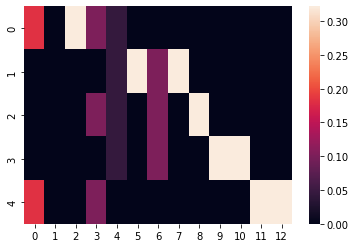

In [47]:
docs = ["doc1.txt", "doc2.txt", "doc3.txt", "doc4.txt", "doc5.txt"]
tfidf = []
idf = idfCals(docs)
print(idf.keys())
for i in docs:
    tf = termFrequency(i)
    l = [idf[key]*tf.get(key, 0) for key in idf]
    tfidf.append(l)
arr = np.array(tfidf)
sns.heatmap(arr)
plt.show()

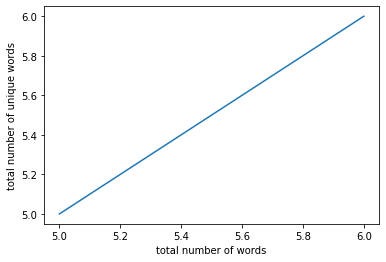

In [36]:
def plotWordCountGraph(docs):
  total = []
  total_unique = []
  for d in docs:
    tokens = getToken(d)
    word_counts = Counter(tokens)
    total.append(len(tokens))
    total_unique.append(len(word_counts))
  plt.plot(total, total_unique)
  plt.xlabel("total number of words")
  plt.ylabel("total number of unique words")
    
  plt.show()

plotWordCountGraph(["doc1.txt", "doc2.txt", "doc3.txt", "doc4.txt", "doc5.txt"])

In [37]:
def cloudPlot(doc):
      with open(doc) as file:
        text = file.read()
      wordcloud = WordCloud().generate(text)
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis('off')
      plt.show()

cloudPlot('doc2.txt')

ValueError: Only supported for TrueType fonts